**Hello everyone!**  

**Welcome to Colab!**

This is a cloud-based development environment designed for machine learning students and professionals. With Google Colab, you can write and run code step-by-step in Python (and also experiment with R or Julia) directly in your browser, without needing any local setup.  

Colab provides free access to GPUs and TPUs (Tensor Processing Units), making it easier to train and test deep learning models at scale. It also integrates smoothly with Google Drive, so you can save, share, and collaborate on notebooks in real time.  

Whether you’re exploring data, building models, or prototyping research ideas, Colab is a flexible and accessible tool to get started quickly.

P.S. you can use it as a text editor too! It supports the markdown format

## Let's start by importing some libraries first:

In [64]:
import torch  # the main module for PyTorch. You need to import torch to use the core features
import torch.nn as nn  # neural network building blocks
import torch.optim as optim  # optimizers (training the neural network)
import matplotlib.pyplot as plt  # visualization

## Now, let's define the training data:

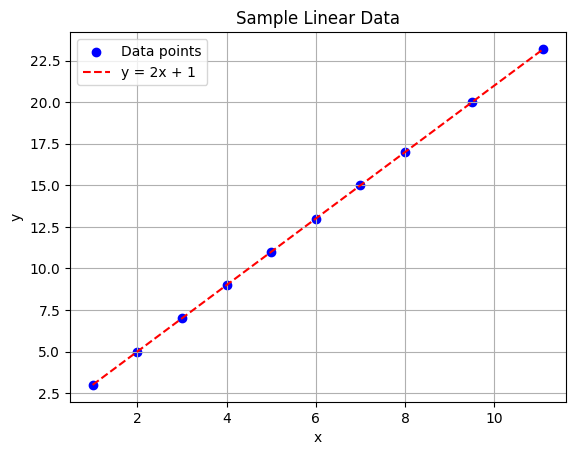

In [65]:
# Sample data: points corresponding to y = 2x + 1
x = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.5], [11.1]])
y = x*2 + 1

# Convert tensors to numpy arrays for plotting
x_np = x.numpy().flatten()
y_np = y.numpy().flatten()

# Plot
plt.scatter(x_np, y_np, color='blue', label='Data points')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()

## Let's define a model we are training (linear regression => a single input and a single output, a linear correlation is assumed):

In [66]:
# Define linear model
model = nn.Linear(1, 1)

## Let's also define the loss function and the optimizer:

In [67]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

## And now we can finally train the model!

In [68]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss and prediction every 100 epochs
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Predictions: {y_pred.detach().numpy().flatten()}, Weight: {w:.4f}, Bias: {b:.4f}")

Epoch 100, Loss: 0.0660, Predictions: [ 2.5399134  4.6125364  6.685159   8.757782  10.830405  12.903028
 14.975651  17.048275  20.15721   23.473408 ], Weight: 2.0723, Bias: 0.4697
Epoch 200, Loss: 0.0264, Predictions: [ 2.7089202  4.754866   6.800812   8.846758  10.892704  12.938649
 14.984595  17.03054   20.099459  23.372974 ], Weight: 2.0457, Bias: 0.6645
Epoch 300, Loss: 0.0106, Predictions: [ 2.8158445  4.844913   6.8739815  8.90305   10.932118  12.961187
 14.990256  17.019323  20.062925  23.309437 ], Weight: 2.0289, Bias: 0.7878
Epoch 400, Loss: 0.0042, Predictions: [ 2.883492   4.901882   6.9202724  8.9386635 10.957054  12.975444
 14.9938345 17.012224  20.03981   23.269236 ], Weight: 2.0183, Bias: 0.8657
Epoch 500, Loss: 0.0017, Predictions: [ 2.9262896  4.9379244  6.949559   8.961194  10.972829  12.984464
 14.9960985 17.007732  20.025185  23.243801 ], Weight: 2.0116, Bias: 0.9150
Epoch 600, Loss: 0.0007, Predictions: [ 2.9533658  4.9607267  6.9680877  8.975449  10.982809  12.990

## Let's see the parameters and make some predictions given this model now:

Learned weight: 2.0012, Learned bias: 0.9914
Predictions for x = 5.0 and 6.0: [[10.997259]
 [12.998432]]


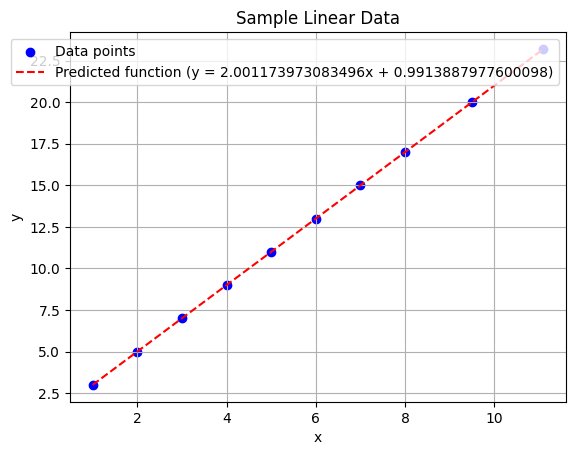

In [69]:
# Learned parameters
[w, b] = model.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Make predictions on new data
x_test = torch.tensor([[5.0], [6.0]])
y_pred_test = model(x_test)
print("Predictions for x = 5.0 and 6.0:", y_pred_test.detach().numpy())

# Plot predictions and real data
plt.scatter(x_np, y_np, color='blue', label='Data points')
plt.plot(x_np, model.weight.item()*x_np + model.bias.item(), color='red', linestyle='--', label=f'Predicted function (y = {model.weight.item()}x + {model.bias.item()})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()

## Let's see how a similar model performs given noisy data:

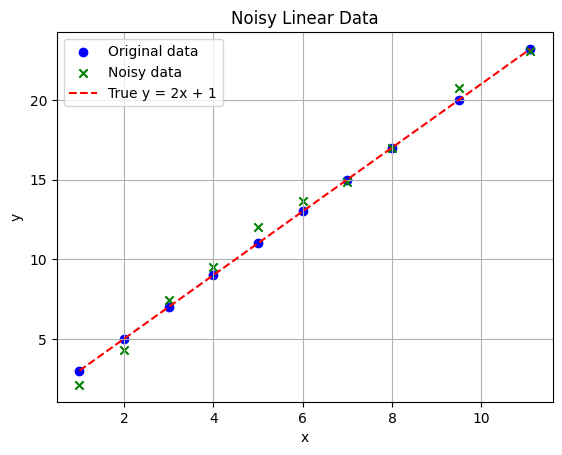

Epoch 100, Loss: 0.3677, Weight: 2.1300, Bias: 0.3028
Epoch 200, Loss: 0.3356, Weight: 2.1061, Bias: 0.4782
Epoch 300, Loss: 0.3227, Weight: 2.0909, Bias: 0.5893
Epoch 400, Loss: 0.3176, Weight: 2.0813, Bias: 0.6595
Epoch 500, Loss: 0.3155, Weight: 2.0753, Bias: 0.7039
Epoch 600, Loss: 0.3147, Weight: 2.0714, Bias: 0.7321
Epoch 700, Loss: 0.3144, Weight: 2.0690, Bias: 0.7499
Epoch 800, Loss: 0.3143, Weight: 2.0675, Bias: 0.7611
Epoch 900, Loss: 0.3142, Weight: 2.0665, Bias: 0.7682
Epoch 1000, Loss: 0.3142, Weight: 2.0659, Bias: 0.7727
Learned weight (noisy data): 2.0659, Learned bias: 0.7727


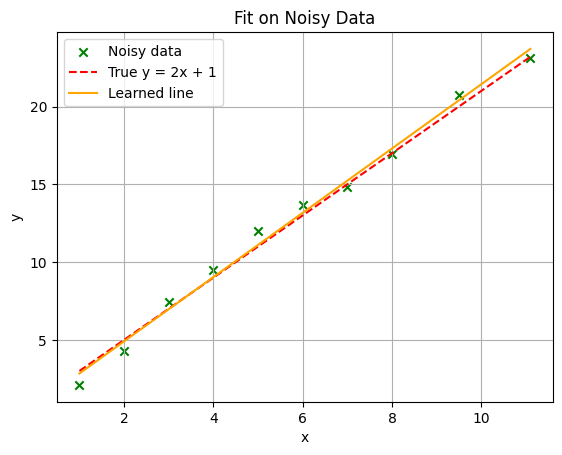

In [70]:
# ---------------------------------
# Create noisy training data
# ---------------------------------

# Original clean data: y = 2x + 1
x_noisy = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.5], [11.1]])
noise = torch.tensor(np.random.normal(0, 0.8, size=x_noisy.shape).astype(np.float32))
y_noisy = 2 * x_noisy + 1 + noise

# Convert to numpy for plotting
x_noisy_np = x_noisy.numpy().flatten()
y_noisy_np = y_noisy.numpy().flatten()

# Plot noisy data vs original
plt.scatter(x_np, y_np, color='blue', label='Original data')
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Linear Data')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------
# Retrain model on noisy data
# ---------------------------------
model_noisy = nn.Linear(1, 1)  # fresh model
criterion = nn.MSELoss()
optimizer = optim.SGD(model_noisy.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    y_pred_noisy = model_noisy(x_noisy)
    loss = criterion(y_pred_noisy, y_noisy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        [w, b] = model_noisy.parameters()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Weight: {w.item():.4f}, Bias: {b.item():.4f}")

# ---------------------------------
# Visualize learned fit on noisy data
# ---------------------------------
[w, b] = model_noisy.parameters()
print(f"Learned weight (noisy data): {w.item():.4f}, Learned bias: {b.item():.4f}")

# Plot noisy points and learned line
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x_np, 2*x_np + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.plot(x_noisy_np, (w.item()*x_noisy_np + b.item()), color='orange', label='Learned line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit on Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

## But what if we want to use a large custom dataset instead of defining something by hand in a code block?